In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
train=pd.read_csv('sample_data/train.csv')
store=pd.read_csv('sample_data/stores.csv')

In [ ]:
train.head()

,st,Date,Store,Dept,other_sales,onpromotion,Weekly_Sales,Temperatures
0,0,1/1/13,1,1,0.0,0.0,24924.50,76.0
1,1,1/1/13,1,2,0.0,0.0,46039.49,76.0
2,2,1/1/13,1,3,0.0,0.0,41595.55,76.0
3,3,1/1/13,1,4,0.0,0.0,19403.54,76.0
4,4,1/1/13,1,5,0.0,0.0,21827.90,76.0


In [ ]:
col_list=['st', 'Date', 'Store', 'Dept', 'other_sales', 'onpromotion', 'Weekly_Sales', 'Temperatures']
merge_df=pd.read_csv('sample_data/train.csv', usecols=col_list)

In [ ]:
merge_df.head()

,st,Date,Store,Dept,other_sales,onpromotion,Weekly_Sales,Temperatures
0,0,1/1/13,1,1,0.0,0.0,24924.50,76.0
1,1,1/1/13,1,2,0.0,0.0,46039.49,76.0
2,2,1/1/13,1,3,0.0,0.0,41595.55,76.0
3,3,1/1/13,1,4,0.0,0.0,19403.54,76.0
4,4,1/1/13,1,5,0.0,0.0,21827.90,76.0


In [ ]:
merge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
st,843137.0,421571.821609,243392.835616,0.00,210788.00,421570.00,632356.000,843140.00
Store,843137.0,27.495129,15.586190,1.00,14.00,27.00,41.000,54.00
Dept,843137.0,16.393809,9.111897,1.00,9.00,16.00,24.000,32.00
other_sales,843137.0,237.451492,791.585791,0.00,0.00,1.00,114.859,46271.00
onpromotion,843137.0,1.178935,43.524398,0.00,0.00,0.00,0.000,36894.54
Weekly_Sales,843137.0,15981.089315,22711.159242,-4988.94,2079.61,7612.01,20205.820,693099.36
Temperatures,843136.0,65.042054,14.700504,40.00,52.00,65.00,78.000,90.00


In [ ]:
from datetime import datetime as dt

In [ ]:
merge_df['DateTimeObj']=[dt.strptime(x,'%m/%d/%y') for x in list(merge_df['Date'])]
merge_df['DateTimeObj'].head()

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-01
4   2013-01-01
Name: DateTimeObj, dtype: datetime64[ns]

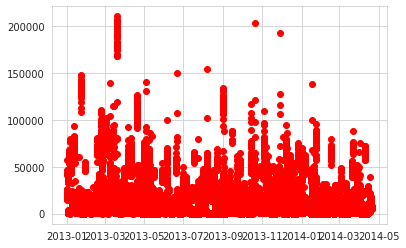

In [ ]:
plt.plot(merge_df[(merge_df.Store==1)].DateTimeObj, merge_df[(merge_df.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [ ]:
weeklysales=merge_df.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysales[0:5]

Store  Date   
1      1/1/13      707436.40
       1/1/14     1369711.65
       1/10/13     210996.97
       1/10/14     380089.76
       1/11/13     155132.08
Name: Weekly_Sales, dtype: float64

In [ ]:
weeklysaledept=merge_df.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysaledept[0:5]

Store  Dept
1      1       7231306.50
       2       7486437.65
       3       7583957.56
       4       7509275.30
       5       7417049.52
Name: Weekly_Sales, dtype: float64

In [ ]:
weeklyscale=weeklysales.reset_index()
weeklyscale[0:5]

,Store,Date,Weekly_Sales
0,1,1/1/13,707436.40
1,1,1/1/14,1369711.65
2,1,1/10/13,210996.97
3,1,1/10/14,380089.76
4,1,1/11/13,155132.08


In [ ]:
#stores_data=pd.merge(weeklyscale, train, on=['Store', 'Date'], how='inner')
#col_list=['Store', 'Date', 'Weekly_Sales', 'Temperatures']
col_list=['Store', 'Date', 'Dept', 'other_sales', 'onpromotion', 'Weekly_Sales', 'Temperatures']
stores_data=pd.read_csv('sample_data/train.csv', usecols=col_list)
stores_data.head()

,Date,Store,Dept,other_sales,onpromotion,Weekly_Sales,Temperatures
0,1/1/13,1,1,0.0,0.0,24924.50,76.0
1,1/1/13,1,2,0.0,0.0,46039.49,76.0
2,1/1/13,1,3,0.0,0.0,41595.55,76.0
3,1/1/13,1,4,0.0,0.0,19403.54,76.0
4,1/1/13,1,5,0.0,0.0,21827.90,76.0


In [ ]:
stores_datadf = stores_data.iloc[:, list(range(7))]

In [ ]:
stores_datadf.head()

,Date,Store,Dept,other_sales,onpromotion,Weekly_Sales,Temperatures
0,1/1/13,1,1,0.0,0.0,24924.50,76.0
1,1/1/13,1,2,0.0,0.0,46039.49,76.0
2,1/1/13,1,3,0.0,0.0,41595.55,76.0
3,1/1/13,1,4,0.0,0.0,19403.54,76.0
4,1/1/13,1,5,0.0,0.0,21827.90,76.0


In [ ]:
stores_datadf['DateTimeObj'] = [dt.strptime(x, '%m/%d/%y') for x in list(stores_datadf['Date'])]
weekNo=stores_datadf.reset_index()

In [ ]:
weekNo = [(x - stores_datadf['DateTimeObj'][0]) for x in list(stores_datadf['DateTimeObj'])]

In [ ]:
stores_datadf['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in weekNo]

In [ ]:
stores_datadf.head()

,Date,Store,Dept,other_sales,onpromotion,Weekly_Sales,Temperatures,DateTimeObj,Week
0,1/1/13,1,1,0.0,0.0,24924.50,76.0,2013-01-01,0.0
1,1/1/13,1,2,0.0,0.0,46039.49,76.0,2013-01-01,0.0
2,1/1/13,1,3,0.0,0.0,41595.55,76.0,2013-01-01,0.0
3,1/1/13,1,4,0.0,0.0,19403.54,76.0,2013-01-01,0.0
4,1/1/13,1,5,0.0,0.0,21827.90,76.0,2013-01-01,0.0


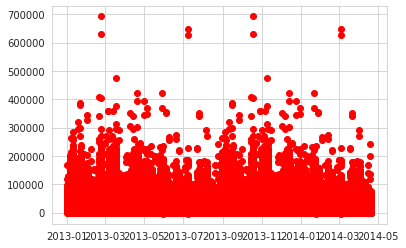

In [ ]:
plt.plot(stores_datadf.DateTimeObj, stores_datadf.Weekly_Sales, 'ro')
plt.show()

In [ ]:
stores_datadf.head()

,Date,Store,Dept,other_sales,onpromotion,Weekly_Sales,Temperatures,DateTimeObj,Week
0,1/1/13,1,1,0.0,0.0,24924.50,76.0,2013-01-01,0.0
1,1/1/13,1,2,0.0,0.0,46039.49,76.0,2013-01-01,0.0
2,1/1/13,1,3,0.0,0.0,41595.55,76.0,2013-01-01,0.0
3,1/1/13,1,4,0.0,0.0,19403.54,76.0,2013-01-01,0.0
4,1/1/13,1,5,0.0,0.0,21827.90,76.0,2013-01-01,0.0


In [ ]:
stores_datadf.Store.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [ ]:
train_WM, test_WM = train_test_split(stores_datadf, test_size=0.3,random_state=45)
print(train_WM)
print(test_WM)

            Date  Store  Dept  ...  Temperatures  DateTimeObj       Week
627375  12/19/13     12    16  ...          40.0   2013-12-19  50.285714
209446   4/28/13     35    32  ...          80.0   2013-04-28  16.714286
115352    3/6/13     45    21  ...          41.0   2013-03-06   9.142857
221321    5/5/13     19    27  ...          56.0   2013-05-05  17.714286
26781    1/16/13     10    22  ...          82.0   2013-01-16   2.142857
...          ...    ...   ...  ...           ...          ...        ...
385604    8/5/13     29     4  ...          41.0   2013-08-05  30.857143
573603  11/18/13     53     2  ...          55.0   2013-11-18  45.857143
606141   12/7/13     17     2  ...          90.0   2013-12-07  48.571429
399228   8/13/13     10    31  ...          90.0   2013-08-13  32.000000
399774   8/13/13     26    16  ...          67.0   2013-08-13  32.000000

[590195 rows x 9 columns]
            Date  Store  Dept  ...  Temperatures  DateTimeObj       Week
651630    1/2/14     42 

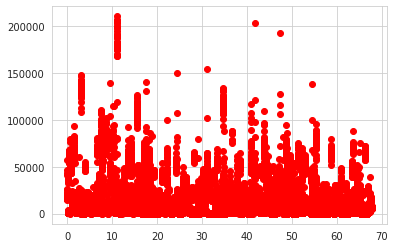

In [ ]:
plt.plot(stores_datadf[(stores_datadf.Store==1)].Week, stores_datadf[(stores_datadf.Store==1)].Weekly_Sales, 'ro')
plt.show()

In [ ]:
XTrain = train_WM[['Week']] #'Temperatures'
#XTrain = train_WM[['Temperatures', 'Week']] #'Temperatures'
YTrain = train_WM['Weekly_Sales']

In [ ]:
XTest = test_WM[['Week']] #'Temperatures',
#XTest = test_WM[['Temperatures', 'Week']] #'Temperatures',
YTest = test_WM['Weekly_Sales']

In [ ]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

LinearRegression(normalize=True)

In [ ]:
wmLinear.coef_

array([-48.28650962])

In [ ]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)

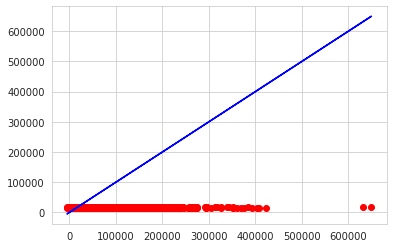

In [ ]:
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [ ]:
stores_datadf['Store'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [ ]:
Store_Dummies = pd.get_dummies(stores_datadf.Store, prefix='Store').iloc[:,1:]
stores_datadf = pd.concat([stores_datadf, Store_Dummies], axis=1)

In [ ]:
stores_datadf.head()

,Date,Store,Dept,other_sales,onpromotion,Weekly_Sales,Temperatures,DateTimeObj,Week,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Store_46,Store_47,Store_48,Store_49,Store_50,Store_51,Store_52,Store_53,Store_54
0,1/1/13,1,1,0.0,0.0,24924.50,76.0,2013-01-01,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/1/13,1,2,0.0,0.0,46039.49,76.0,2013-01-01,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1/1/13,1,3,0.0,0.0,41595.55,76.0,2013-01-01,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/1/13,1,4,0.0,0.0,19403.54,76.0,2013-01-01,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/1/13,1,5,0.0,0.0,21827.90,76.0,2013-01-01,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_WM, test_WM = train_test_split(stores_datadf, test_size=0.3,random_state=42)
XTrain = train_WM.iloc[:,([6]) + list(range(9,stores_datadf.shape[1]))]
yTrain = train_WM.Weekly_Sales           
XTest = test_WM.iloc[:,([6]) + list(range(9,stores_datadf.shape[1]))]
yTest=test_WM.Weekly_Sales

54
590195


In [ ]:
XTrain.head()

,Temperatures,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Store_46,Store_47,Store_48,Store_49,Store_50,Store_51,Store_52,Store_53,Store_54
546268,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
725687,78.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
442324,63.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38205,84.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
842705,79.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear.fit(XTrain, YTrain)

ValueError: ignored

In [ ]:
#Performance on the test data sets
YHatTest = wmLinear.predict(XTest)
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

In [ ]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - YHatTest)/YTest))
MSSE = np.mean(np.square(YHatTest - YTest))

print(MAPE, MSSE)

In [ ]:
# Dimensionality Reduction

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
alphas = np.linspace(10, 20, 10)

In [ ]:
testError = np.empty(10)

for i, alpha in enumerate(alphas) :
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(XTrain, YTrain)
    testError[i] = mean_squared_error(YTest, lasso.predict(XTest))

In [ ]:
plt.plot(alphas, testError, 'r-')
plt.show()

In [ ]:
wmLinear = linear_model.LinearRegression(normalize=True)
wmLinear

In [ ]:
lasso = Lasso(alpha=17)
lasso.fit(XTrain, YTrain)